Loading and displaying first 10 rows of the dataset:


,headline,label
0,MyBook Disk Drive Handles Lots of Easy Backups,not clickbait
1,CIT Posts Eighth Loss in a Row,not clickbait
2,"Candy Carson Singing The ""National Anthem"" Is ...",clickbait
3,Why You Need To Stop What You're Doing And Dat...,clickbait
4,27 Times Adele Proved She's Actually The Reale...,clickbait
5,29 Times #BlackGirlMagic Was More Than Just A ...,clickbait
6,Scientology ties at New Village Leadership Aca...,not clickbait
7,Judge Allows Asbestos Case to Continue,not clickbait
8,Cities Deal With a Surge in Shantytowns,not clickbait
9,15 Reasons December Is The Best Month,clickbait



Model 1: Simple Bag of Words Approach
F1 Score: 0.967
Best C value: 10

Model 2: TF-IDF with N-grams
F1 Score: 0.947
Best C value: 100

Model 3: Character N-grams
F1 Score: 0.970
Best C value: 1


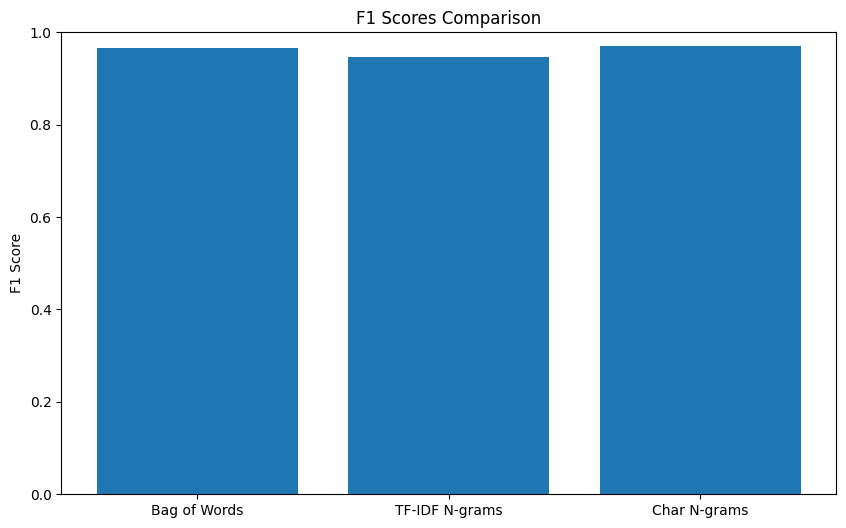


Top Features Analysis:
Model 1 Top Features:


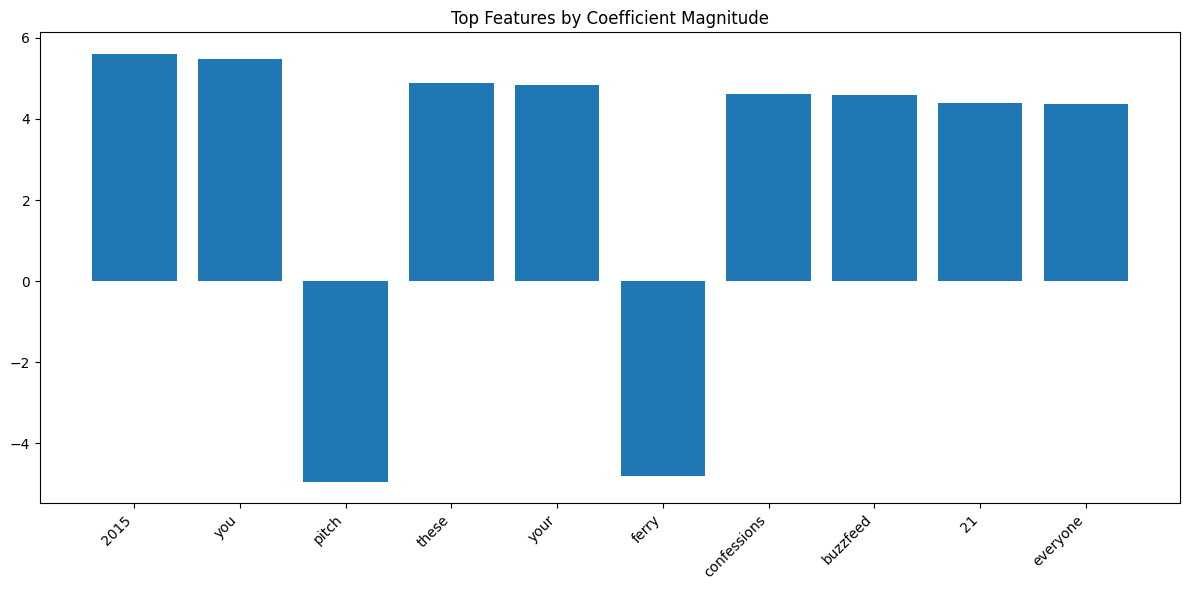


Model 2 Top Features:


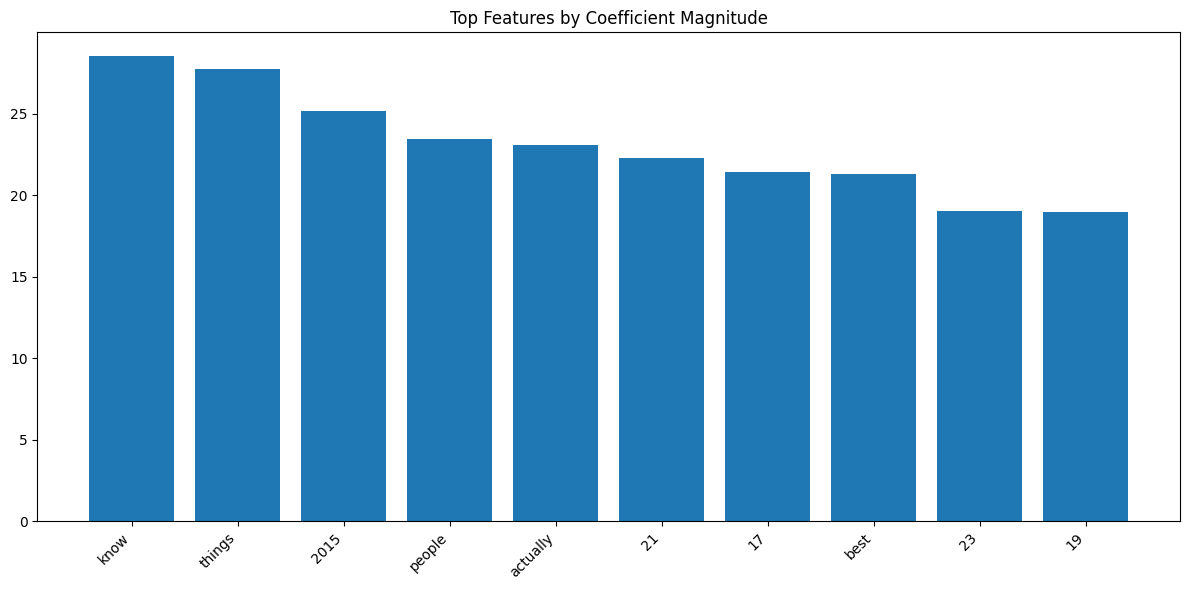


Model 3 Top Features:


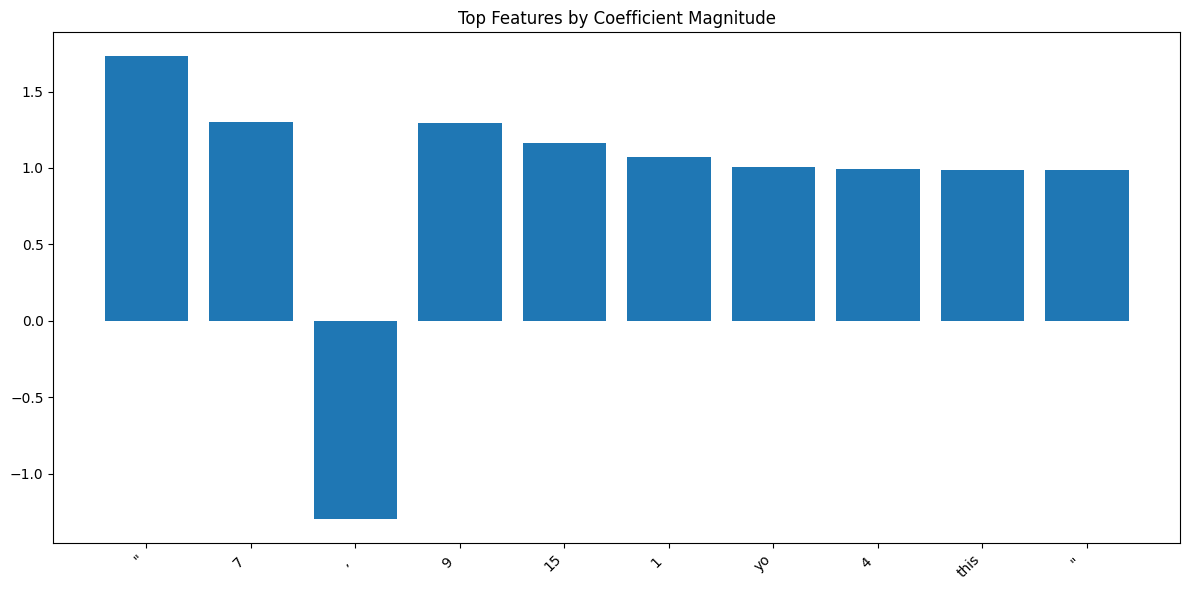

In [2]:
# Part A: Build a classification model using text data

## Data Import and Preparation
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
print("Loading and displaying first 10 rows of the dataset:")
data = pd.read_csv('text_training_data.csv')
display(data.head(10))

## Model 1: Simple Bag of Words
print("\nModel 1: Simple Bag of Words Approach")

# Prepare data
vectorizer1 = CountVectorizer()
X = vectorizer1.fit_transform(data['headline'])
y = (data['label'] == 'clickbait').astype(int)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Grid search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search1 = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, scoring='f1', cv=5)
grid_search1.fit(X_train, y_train)

# Evaluate
y_pred = grid_search1.predict(X_test)
f1_score1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1_score1:.3f}")
print(f"Best C value: {grid_search1.best_params_['C']}")

## Model 2: TF-IDF with N-grams
print("\nModel 2: TF-IDF with N-grams")

vectorizer2 = TfidfVectorizer(ngram_range=(1, 2), stop_words='english')
X = vectorizer2.fit_transform(data['headline'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Grid search
grid_search2 = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, scoring='f1', cv=5)
grid_search2.fit(X_train, y_train)

# Evaluate
y_pred = grid_search2.predict(X_test)
f1_score2 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1_score2:.3f}")
print(f"Best C value: {grid_search2.best_params_['C']}")

## Model 3: Count Vectorizer with Character N-grams
print("\nModel 3: Character N-grams")

vectorizer3 = CountVectorizer(analyzer='char', ngram_range=(2, 4))
X = vectorizer3.fit_transform(data['headline'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Grid search
grid_search3 = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, scoring='f1', cv=5)
grid_search3.fit(X_train, y_train)

# Evaluate
y_pred = grid_search3.predict(X_test)
f1_score3 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1_score3:.3f}")
print(f"Best C value: {grid_search3.best_params_['C']}")

# Visualize model comparison
plt.figure(figsize=(10, 6))
models = ['Bag of Words', 'TF-IDF N-grams', 'Char N-grams']
scores = [f1_score1, f1_score2, f1_score3]
plt.bar(models, scores)
plt.title('F1 Scores Comparison')
plt.ylabel('F1 Score')
plt.ylim(0, 1)
plt.show()

# Analyze top coefficients for best model
def plot_top_features(model, vectorizer, n=10):
    coef_dict = dict(zip(vectorizer.get_feature_names_out(), model.coef_[0]))
    top_features = sorted(coef_dict.items(), key=lambda x: abs(x[1]), reverse=True)[:n]
    
    features, coefficients = zip(*top_features)
    plt.figure(figsize=(12, 6))
    plt.bar(features, coefficients)
    plt.xticks(rotation=45, ha='right')
    plt.title('Top Features by Coefficient Magnitude')
    plt.tight_layout()
    plt.show()

# Plot top features for each model
print("\nTop Features Analysis:")
print("Model 1 Top Features:")
plot_top_features(grid_search1.best_estimator_, vectorizer1)
print("\nModel 2 Top Features:")
plot_top_features(grid_search2.best_estimator_, vectorizer2)
print("\nModel 3 Top Features:")
plot_top_features(grid_search3.best_estimator_, vectorizer3)


Loading Iris dataset and displaying first 10 rows:


,rownames,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
5,6,5.4,3.9,1.7,0.4,setosa
6,7,4.6,3.4,1.4,0.3,setosa
7,8,5.0,3.4,1.5,0.2,setosa
8,9,4.4,2.9,1.4,0.2,setosa
9,10,4.9,3.1,1.5,0.1,setosa



Model 1: 2 hidden layers with 16 neurons each


C:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6333 - loss: 0.6229
Test Accuracy: 0.633

Model 2: 3 hidden layers with 32 neurons each
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 1.0000 - loss: 0.1044
Test Accuracy: 1.000

Model 3: 1 hidden layer with 64 neurons
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 0.2371
Test Accuracy: 1.000


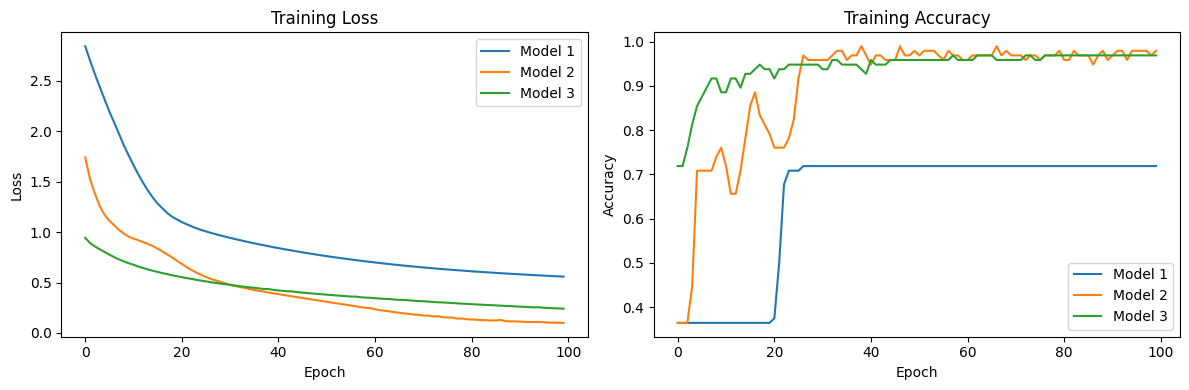

In [3]:

# Part B: Build a Predictive Neural Network Using Keras

## Data Preparation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

# Load iris data
print("\nLoading Iris dataset and displaying first 10 rows:")
iris_data = pd.read_csv('http://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv')
display(iris_data.head(10))

X = iris_data.iloc[:, 1:5].values
y = pd.get_dummies(iris_data['Species']).values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model 1: 2 hidden layers with 16 neurons each
print("\nModel 1: 2 hidden layers with 16 neurons each")
model1 = Sequential([
    Dense(16, activation='relu', input_shape=(4,)),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
])

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history1 = model1.fit(X_train, y_train, epochs=100, batch_size=32, 
                     validation_split=0.2, verbose=0)
accuracy1 = model1.evaluate(X_test, y_test)[1]
print(f"Test Accuracy: {accuracy1:.3f}")

## Model 2: 3 hidden layers with 32 neurons each
print("\nModel 2: 3 hidden layers with 32 neurons each")
model2 = Sequential([
    Dense(32, activation='relu', input_shape=(4,)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history2 = model2.fit(X_train, y_train, epochs=100, batch_size=32, 
                     validation_split=0.2, verbose=0)
accuracy2 = model2.evaluate(X_test, y_test)[1]
print(f"Test Accuracy: {accuracy2:.3f}")

## Model 3: 1 hidden layer with 64 neurons
print("\nModel 3: 1 hidden layer with 64 neurons")
model3 = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),
    Dense(3, activation='softmax')
])

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history3 = model3.fit(X_train, y_train, epochs=100, batch_size=32, 
                     validation_split=0.2, verbose=0)
accuracy3 = model3.evaluate(X_test, y_test)[1]
print(f"Test Accuracy: {accuracy3:.3f}")

# Visualize training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history1.history['loss'], label='Model 1')
plt.plot(history2.history['loss'], label='Model 2')
plt.plot(history3.history['loss'], label='Model 3')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history1.history['accuracy'], label='Model 1')
plt.plot(history2.history['accuracy'], label='Model 2')
plt.plot(history3.history['accuracy'], label='Model 3')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()